In [ ]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC




In [ ]:
data_file = files.upload()
data = pd.read_csv(io.BytesIO(data_file['titanic_train.csv']))

print(data.info())
print(data.describe())
data.head()

Saving titanic_train.csv to titanic_train (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


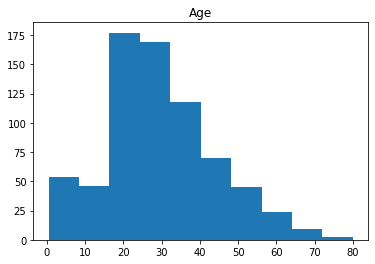

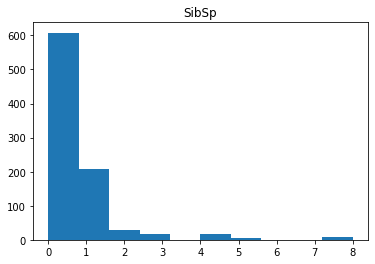

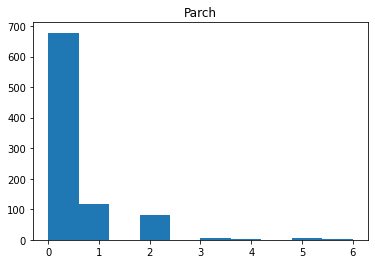

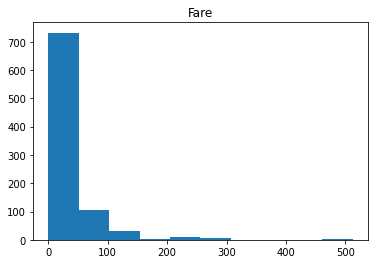

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


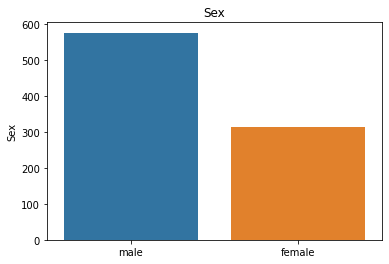

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


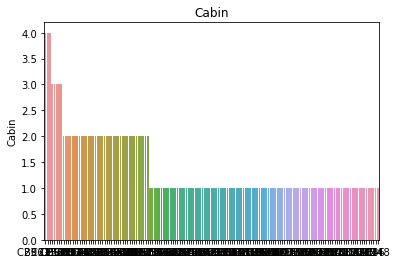

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


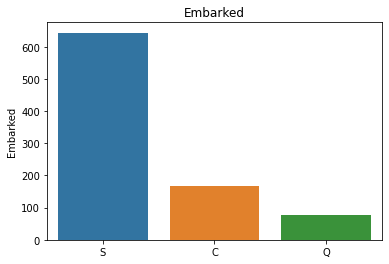

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


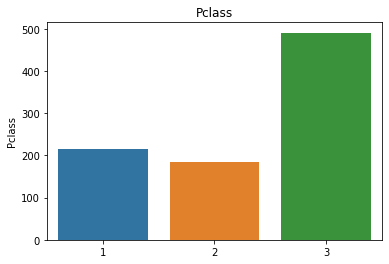

In [ ]:
# Visualazion data to get better understanding 
num_data = data[['Age', 'SibSp', 'Parch', 'Fare']]
cat_data = data[['Sex', 'Cabin', 'Embarked', 'Pclass']]

for i in num_data.columns:
  plt.hist(num_data[i])
  plt.title(i)
  plt.show()

for i in cat_data.columns:
  sns.barplot(cat_data[i].value_counts().index, cat_data[i].value_counts()).set_title(i)
  plt.show()

In [ ]:
def drop(data):
  data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
  return data

drop(data)

print(data.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [ ]:
def fillAge(data):
  data.Age.fillna(data['Age'].median(), inplace = True)
  return data

fillAge(data)




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [ ]:
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

def convert(data):
  data.Sex = le.fit_transform(data.Sex)
  print(le.classes_)
  return data

convert(data)

def scaling(data):
  scaler.fit(data[['Age', 'Fare']])
  data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])
  return data

scaling(data)

print(data.head())


['female' 'male']
   Survived  Pclass  Sex       Age  SibSp  Parch      Fare
0         0       3    1 -0.565736      1      0 -0.502445
1         1       1    0  0.663861      1      0  0.786845
2         1       3    0 -0.258337      0      0 -0.488854
3         1       1    0  0.433312      1      0  0.420730
4         0       3    1  0.433312      0      0 -0.486337


In [ ]:
y = data['Survived']
X = data.drop(['Survived'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
classifier = SVC()
classifier.fit(x_train, y_train)
svm_predict = classifier.predict(x_test)
accuracy_score(y_test, svm_predict)

0.8156424581005587